In [19]:
using DifferentialEquations, Plots;
p_cr = 27 #критическая стоимость продукта
tau1 = 27 #длительность производственного цикла фирмы 1
p1 = 6.7 #себестоимость продукта у фирмы 1
tau2 = 17 #длительность производственного цикла фирмы 2
p2 = 11.7 #себестоимость продукта у фирмы 2
N = 37 #число потребителей производимого продукта
q = 1; #максимальная потребность одного человека в продукте в единицу времени

a1 = p_cr/(tau1^2*p1^2*N*q);
a2 = p_cr/(tau2^2*p2^2*N*q);
b = p_cr/(tau1^2*tau2^2*p1^2*p2^2*N*q);
c1 = (p_cr-p1)/(tau1*p1);
c2 = (p_cr-p2)/(tau2*p2);

u0 = [3.7, 2.8] #начальные значения M1 и M2
p = [a1, a2, b, c1, c2]
tspan = (0.0, 30.0) #временной интервал


(0.0, 30.0)

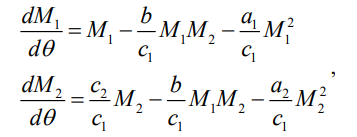

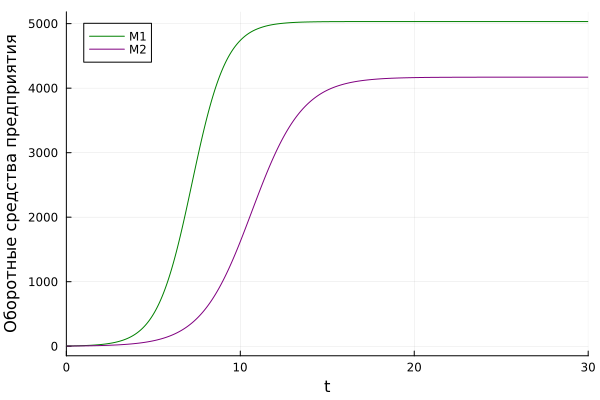

In [15]:
using DifferentialEquations, Plots;
p_cr = 27 #критическая стоимость продукта
tau1 = 27 #длительность производственного цикла фирмы 1
p1 = 6.7 #себестоимость продукта у фирмы 1
tau2 = 17 #длительность производственного цикла фирмы 2
p2 = 11.7 #себестоимость продукта у фирмы 2
N = 37 #число потребителей производимого продукта
q = 1; #максимальная потребность одного человека в продукте в единицу времени

a1 = p_cr/(tau1^2*p1^2*N*q);
a2 = p_cr/(tau2^2*p2^2*N*q);
b = p_cr/(tau1^2*tau2^2*p1^2*p2^2*N*q);
c1 = (p_cr-p1)/(tau1*p1);
c2 = (p_cr-p2)/(tau2*p2);

u0 = [3.7, 2.8] #начальные значения M1 и M2
p = [a1, a2, b, c1, c2]
tspan = (0.0, 30.0) #временной интервал

function f(u, p, t)
    M1, M2 = u
    a1, a2, b, c1, c2 = p
    M1 = M1 - (b/c1)*M1*M2 - (a1/c1)*M1^2
    M2 = (c2/c1)*M2 - (b/c1)*M1*M2 - (a2/c1)*M2^2 
    return [M1, M2]
end

prob = ODEProblem(f, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat = 0.01)
plot(sol, yaxis = "Оборотные средства предприятия", label = ["M1" "M2"], c = ["green" "purple"])

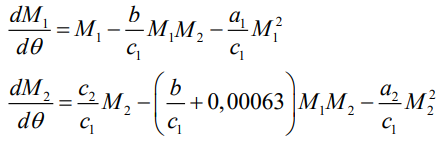

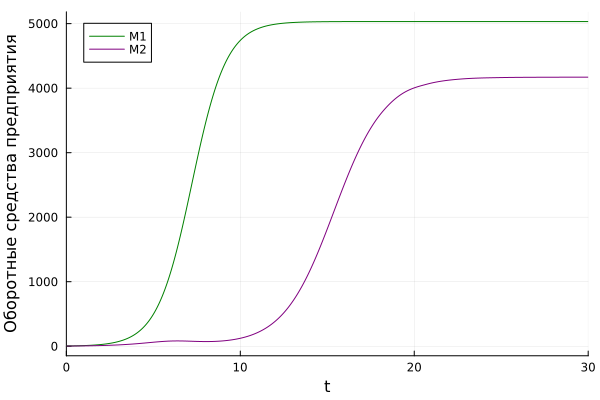

In [20]:
function f(u, p, t)
    M1, M2 = u
    a1, a2, b, c1, c2 = p
    M1 = M1 - (b/c1)*M1*M2 - (a1/c1)*M1^2 
    M2 = (c2/c1)*M2 - (b/c1 + 0.00063)*M1*M2 - (a2/c1)*M2^2 
    return [M1, M2]
end
prob = ODEProblem(f, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat = 0.01)
plot(sol, yaxis = "Оборотные средства предприятия", label = ["M1" "M2"], c = ["green" "purple"])
